In [24]:
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import np_utils

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

batch_size = 32
nb_classes = 100
nb_epoch = 20

img_rows, img_cols = 32, 32
img_channels = 3

(X_train, y_train), (X_test, y_test) = cifar100.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train shape: (50000, 3, 32, 32)
50000 train samples
10000 test samples


In [25]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same',
                        input_shape=(img_channels, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [26]:
np.random.seed(1337)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
result_notBN_lowLr = model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)

np.random.seed(1337)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
result_notBN_highLr = model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 47s - loss: 4.3563 - acc: 0.0403 - val_loss: 4.0180 - val_acc: 0.0882
Epoch 2/20
50000/50000 [==============================] - 48s - loss: 3.6969 - acc: 0.1346 - val_loss: 3.2762 - val_acc: 0.2139
Epoch 3/20
50000/50000 [==============================] - 47s - loss: 3.2998 - acc: 0.2029 - val_loss: 2.9848 - val_acc: 0.2733
Epoch 4/20
50000/50000 [==============================] - 48s - loss: 3.0870 - acc: 0.2429 - val_loss: 2.8616 - val_acc: 0.2862
Epoch 5/20
50000/50000 [==============================] - 47s - loss: 2.9329 - acc: 0.2733 - val_loss: 2.6919 - val_acc: 0.3252
Epoch 6/20
50000/50000 [==============================] - 48s - loss: 2.8148 - acc: 0.2956 - val_loss: 2.6108 - val_acc: 0.3341
Epoch 7/20
50000/50000 [==============================] - 47s - loss: 2.7138 - acc: 0.3156 - val_loss: 2.4844 - val_acc: 0.3658
Epoch 8/20
50000/50000 [==============================

In [27]:
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(BatchNormalization(input_shape=(img_channels, img_rows, img_cols)))
model.add(Convolution2D(32, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [28]:
np.random.seed(1337)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
result_Bn_lowLr = model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)

np.random.seed(1337)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
result_Bn_highLr = model.fit(X_train, Y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, Y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 114s - loss: 4.3385 - acc: 0.0456 - val_loss: 3.8802 - val_acc: 0.1127
Epoch 2/20
50000/50000 [==============================] - 115s - loss: 3.7467 - acc: 0.1238 - val_loss: 3.3280 - val_acc: 0.2015
Epoch 3/20
50000/50000 [==============================] - 114s - loss: 3.3679 - acc: 0.1907 - val_loss: 2.9863 - val_acc: 0.2663
Epoch 4/20
50000/50000 [==============================] - 114s - loss: 3.1084 - acc: 0.2377 - val_loss: 2.8001 - val_acc: 0.3030
Epoch 5/20
50000/50000 [==============================] - 115s - loss: 2.9079 - acc: 0.2746 - val_loss: 2.6550 - val_acc: 0.3328
Epoch 6/20
50000/50000 [==============================] - 114s - loss: 2.7467 - acc: 0.3061 - val_loss: 2.4986 - val_acc: 0.3573
Epoch 7/20
50000/50000 [==============================] - 115s - loss: 2.6188 - acc: 0.3338 - val_loss: 2.4012 - val_acc: 0.3914
Epoch 8/20
50000/50000 [=======================

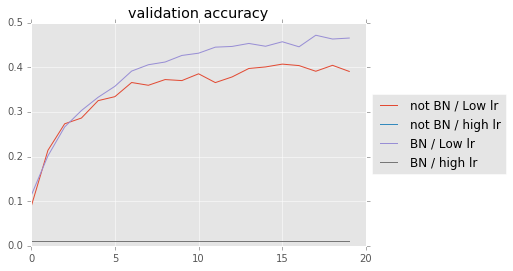

In [30]:
x = range(nb_epoch)
plt.plot(x, result_notBN_lowLr.history['val_acc'], label="not BN / Low lr")
plt.plot(x, result_notBN_highLr.history['val_acc'], label="not BN / high lr")
plt.plot(x, result_Bn_lowLr.history['val_acc'], label="BN / Low lr")
plt.plot(x, result_Bn_highLr.history['val_acc'], label="BN / high lr")

plt.title("validation accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()